# Analyzing time domain data of DM Tau

In [ ]:
#### Conda environment
## environment terada2019
# conda create --name terada2019 python=3.7
# pip install --upgrade pip
# pip install astropy scipy
# pip install photutils
# pip install jupyter matplotlib h5py aplpy pyregion PyAVM healpy
# pip install astroquery
# pip install pandas
# pip install -U statsmodels
# pip install -U scikit-learn

In [ ]:
import os
import sys
import time
sys.path
sys.path.append('./')

### My own package ##########################
from Classlightcurve import *
from ClassAPT import *
#############################################
#%matplotlib inline

#### Format of marker file:

name, ra_h ra_m ra_s dec_d dec_m dec_s  R:0-1 G:0-1 B:0-1 alpha  size

dm_tau  04 33 48.7335659850  +18 10 09.974471722  1 0.2 0.2 1.0 2.0

#### Format of reference star file

name, ra dec R:0-1 G:0-1 B:0-1 alpha size band jd count file_name

1_8 68.61225456763495 18.265153228501678 1 0 1 1 30 I 2458491.56799249 82873.91795331985 dm tau_3463766_I_015.fits

### Recommended strategy of running this pipeline:

1. First produce preview images for all images, and then produce a skip_file_lis after visual inspect.

2. Run the rest of the procedures, incorporating skip_file_lis to save time and avoid crashing DAOstarfinder and photoutils

In [ ]:
'''
dmtau = apt_pipe(data_path = [
                              r"../DATA/3463766-dm tau",
                              r"../DATA/3486034-dm tau",
                              r"../DATA/3488473-dm tau",
                              #r"../problem_images",
                             ],
                 markerfile   = './markers.txt', verbose=True)
dmtau.plot_preview(label_marker=False, output_directory = 'Initial_preview_images',
                   refstar_file='reference_star.txt', simbad_file='refdb_vizier.txt')
'''

In [ ]:
# %matplotlib inline
dmtau = apt_pipe(data_path = [
                              r"../DATA/3463766-dm tau",
                              r"../DATA/3486034-dm tau",
                              r"../DATA/3488473-dm tau",
#                              r"../problem_images",
                             ],
                 markerfile   = './markers.txt', verbose=True)

skip_file_list = [
                 'dm tau_3463766_R_022.fits',  # PSF not round
                 'dm tau_3463766_I_033.fits',  # PSF not round
                 'dm tau_3463766_I_034.fits',  # PSF not round
                 'dm tau_3463766_I_035.fits',  # PSF not round
                 'dm tau_3463766_V_018.fits',  # PSF not round
                 'dm tau_3463766_V_019.fits',  # PSF not round
                 'dm tau_3463766_V_020.fits',  # PSF not round
                 'dm tau_3463766_V_027.fits',  # PSF not round
                 'dm tau_3463766_V_028.fits',  # PSF not round
                 'dm tau_3463766_V_029.fits',  # PSF not round
                 'dm tau_3488473_V_024.fits',  # Very extended bright emission. Crashed DAOStarFinder.
                 'dm tau_3488473_V_075.fits',  # Very bright sky and not round PSF. Crashed DAOStarFinder.
                 'dm tau_3488473_V_075.fits',  # Very bright sky
                 'dm tau_3488473_I_014.fits',  # Very bright sky
                 'dm tau_3488473_I_041.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_044.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_050.fits',  # High noise. Target not detected.
                 'dm tau_3488473_I_053.fits',  # High noise. Target not detected.
                 'dm tau_3488473_I_056.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_I_059.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_I_194.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_203.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_206.fits',  # Very bad focus.
                 'dm tau_3488473_I_224.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_236.fits',  # Very bright sky
                 'dm tau_3488473_I_242.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_245.fits',  # Very elongated PSF.
                 'dm tau_3488473_I_251.fits',  # target source covered by dark halo
                 'dm tau_3488473_I_254.fits',  # target source covered by dark halo
                 'dm tau_3488473_I_257.fits',  # target source covered by dark halo
                 'dm tau_3488473_I_263.fits',  # Very elongated PSF
                 'dm tau_3488473_I_266.fits',  # Very bright sky
                 'dm tau_3488473_R_013.fits',  # Very bright sky
                 'dm tau_3488473_R_040.fits',  # Very elongated PSF. Crashed DAOStarFinder.
                 'dm tau_3488473_R_046.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_R_049.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_R_052.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_R_055.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_R_058.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_R_205.fits',  # Very bad focus.
                 'dm tau_3488473_R_193.fits',  # Very elongated PSF.
                 'dm tau_3488473_R_223.fits',  # Very elongated PSF.
                 'dm tau_3488473_R_241.fits',  # Very elongated PSF.
                 'dm tau_3488473_R_262.fits',  # Very elongated PSF.
                 'dm tau_3488473_R_265.fits',  # Very bright sky
                 'dm tau_3488473_V_012.fits',  # Very bright sky
                 'dm tau_3488473_V_015.fits',  # Very bright sky
                 'dm tau_3488473_V_039.fits',  # Very elongated PSF.
                 'dm tau_3488473_V_042.fits',  # Very elongated PSF.
                 'dm tau_3488473_V_045.fits',  # High noise. Target barely detected.
                 'dm tau_3488473_V_048.fits',  # High noise. No reference star detected.
                 'dm tau_3488473_V_192.fits',  # Very elongated PSF.
                 'dm tau_3488473_V_195.fits',  # Very elongated PSF.
                 'dm tau_3488473_V_204.fits',  # Very bad focus.
                 'dm tau_3488473_V_213.fits',  # Poor S/N
                 'dm tau_3488473_V_216.fits',  # Very elongated PSF.
                 'dm tau_3488473_V_222.fits',  # Very elongated PSF.
                 'dm tau_3488473_V_258.fits',  # Very bright sky
                 'dm tau_3488473_V_261.fits',  # Very bright sky
                 'dm tau_3488473_V_264.fits',  # Very bright sky
                ]


# preliminary run on target sources to obtain count range
dmtau.do_apt(fwhm=5.0, fit_fwhm=True, use_fwhmfit=False, skip_file_list = skip_file_list)


# Finding reference stars and measure their counts
dmtau.find_ref(fit_fwhm=True, fwhm=0.0, apt_sigmathreshold=40,
                   refstar_file ='reference_star.txt', stack_PSF=False,
                   skip_file_list = skip_file_list)

'''
# Plotting preview images
# dmtau.plot_preview(label_marker=False,
#                   refstar_file='reference_star.txt',
                   # simbad_file='refdb_simbad.txt'
#                   simbad_file='refdb_vizier.txt'
#                    )
'''

# Doing aperture photometry (i.e., measuring counts)
dmtau.do_apt(fwhm=0.0, fit_fwhm=False, skip_file_list=skip_file_list)

# Converting counts to magnitudes based on making query to SIMBAD or Vizier
# *** This step is very time consuming if using Vizier. Excuete only when it is definitely necessary
#     to update the table.
# dmtau.get_db(refstar_file = 'reference_star.txt', search_radii_arcsec = 3.0, 
# #             #db='simbad', outrefdb_file='refdb_simbad.txt'
#               db='vizier',  outrefdb_file='refdb_vizier.txt'
#              )

# Plotting preview images
# dmtau.plot_preview(label_marker=False,
#                    refstar_file='reference_star.txt',
#                    # simbad_file='refdb_simbad.txt'
#                     simbad_file='refdb_vizier.txt'
#                     )

# Converting from counts to magnitudes
dmtau.cal_dbmag(inrefdb_file='refdb_vizier.txt', refstar_file ='reference_star.txt', 
                search_radii_arcsec = 3.0)



# Export photometry
dmtau.export_apt()

### Analyzing K2 data of DM Tau

Warning. Time step is not uniform. 

Identified time steps :  {0.020433000000139145, 0.02043199999980061, 0.020432000000255357, 0.02043200000116485, 0.020431999998436368, 0.020431999998891115, 0.020432999998774903, 0.020432999999684398, 0.02043300000104864, 0.020433000001503387, 0.02043099999991682, 0.020430999999462074, 0.020433000000593893, 0.02043100000037157, 0.020431999999345862, 0.020431000001281063, 0.020430999999007327, 0.020428000000265456, 0.02043599999979051, 0.02043099999855258} 



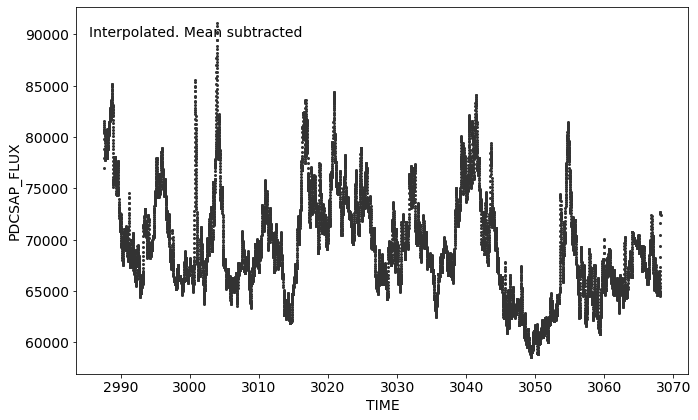

The M value is : 0.12063341358801276


<Figure size 432x288 with 0 Axes>

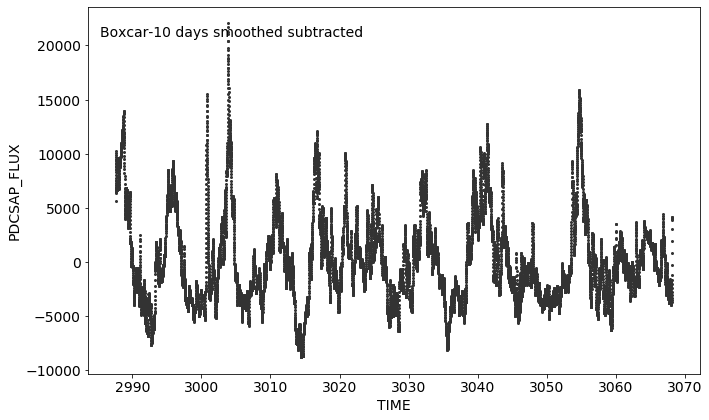

<Figure size 432x288 with 0 Axes>

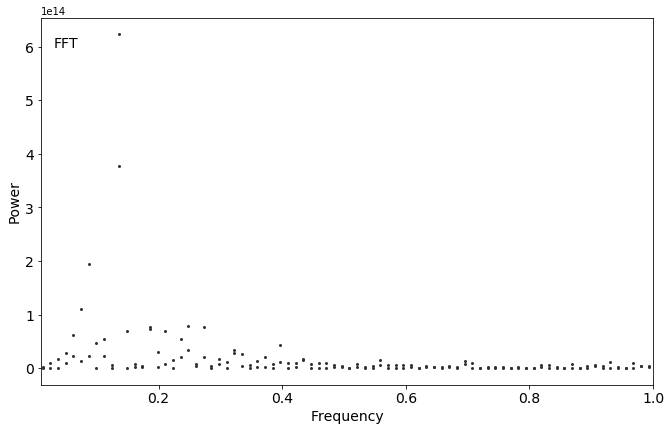

Found periods derived using FFT :  7.32386363625706 +/- -1.3407530684223454


<Figure size 432x288 with 0 Axes>

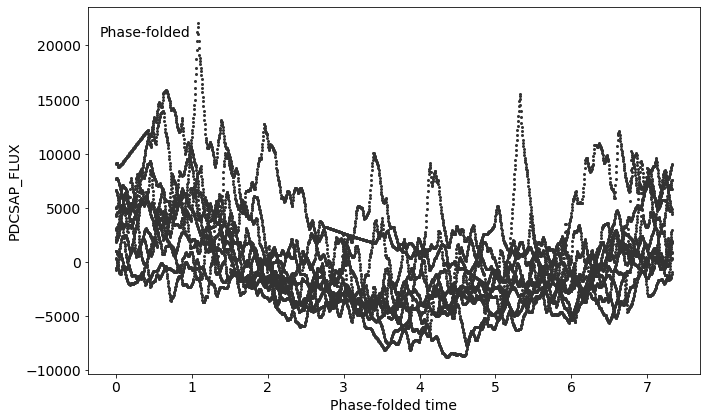

<Figure size 432x288 with 0 Axes>

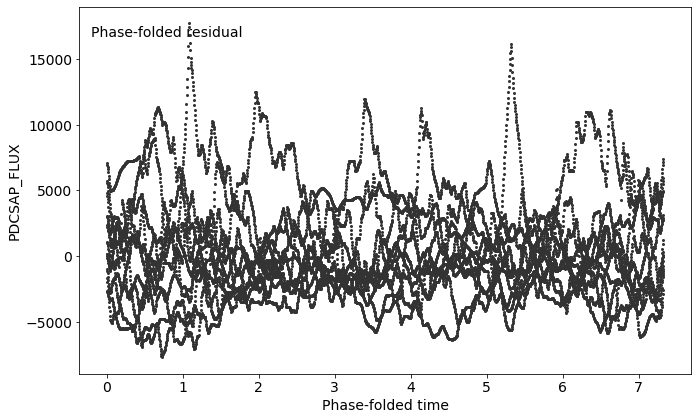

The Q value is : 0.6459366101539614


<Figure size 432x288 with 0 Axes>

In [2]:
source_name = 'dmtau_'

# Load data and plot a preview
dmtau = lightcurve(filename = '../DATA/K2/DM-Tau_1.csv',
                      time_col_label='TIME',
                      data_col_label='PDCSAP_FLUX',
                      plot_preview=False,
                      previewfig_name=source_name + 'input.pdf',
                      verbose=True
                     )

# dmtau.data = np.log10(dmtau.data)

# interpolating data on regular time grid (following Cody+14 to use 6 mins grid)
time_grid = np.arange(dmtau.mintime, dmtau.maxtime, 6.0 * (1.0/(24.0*60.0) )  )
dmtau.interpolate(time_grid = time_grid,
                     plot_preview=False,
                     previewfig_name=source_name + 'interpolate.pdf'
                    )
dmtau.data_plot = dmtau.data
dmtau.time_plot = dmtau.time


# subtract mean value from the data
# --- comment: unsatisfied. Try removing polynomial
dmtau.data = dmtau.data - np.mean(dmtau.data)
dmtau.plotdata(source_name + 'interpolate_meansubtracted.pdf', 
                 label='Interpolated. Mean subtracted')

##### Steps for derving M parameter #######################################################

smoothed_data = dmtau.boxcar_smooth(boxsize=2.0/24.0)
dmtau.data_plot = dmtau.data - smoothed_data
dmtau.get_M(sigma_clip=5.0)
print('The M value is :', dmtau.M)

##### Steps for derving period and Q parameter ############################################

# Following Cody et al. (2014) to subtract boxcar-smoothed version with a window of 10 days
smoothed_data = dmtau.boxcar_smooth(boxsize=10.0)
dmtau.data_plot = dmtau.data - smoothed_data
dmtau.plotdata(source_name + 'boxcar_subtracted.pdf', 
                 label='Boxcar-10 days smoothed subtracted')

# satisfied with subtraction. Apply to actual data
dmtau.data = dmtau.data_plot

# performing fft
dmtau.fft(plot_preview=True, previewfig_name=source_name + 'FFT.pdf', xlim=[0.01,1.0])

# Obtaining the period using the FFT method
dmtau.get_period(method='fft')

# Phase-folding data
# dmtau.period = 7.355520000000001  # The value used by Terada
dmtau.phase_fold(plot_preview=True, previewfig_name=source_name + 'phasefold.pdf')

# residual
dmtau.phase_fold(residual=True, timebin=0.1, plot_preview=True, 
                    previewfig_name=source_name + 'phasefold_residual.pdf')

# evaluate Q value
dmtau.get_Q(sigma=0.0, timebin=0.3)
print('The Q value is :', dmtau.Q)

### Fine-tuning the period by minimizing Q. This is qualitatively similar with doing auto-correlation.

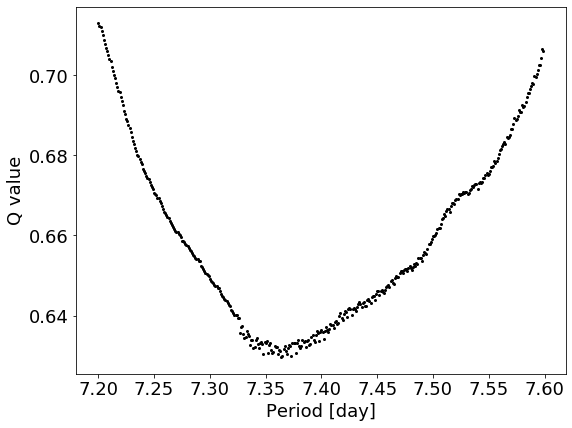

The minimum Q of DM Tau is : 0.6296318294694313
The period is 7.364


<Figure size 432x288 with 0 Axes>

In [11]:
# Find the minimum possible Q
Q_list      = []
period_list = []
for period in np.arange(7.2, 7.6, 0.001):
    dmtau.period = period
    dmtau.data_plot = dmtau.data
    dmtau.get_Q(sigma=0.0, timebin=0.05)
    Q_list.append(dmtau.Q)
    period_list.append(period)

    
# Plotting results
fig = plt.figure(figsize=[8,6])
ax  = fig.add_axes([0.1,0.1,0.85,0.85])

plt.tick_params(labelsize=18)
plt.xlabel('Period [day]', fontsize=18)
plt.ylabel('Q value', fontsize=18)
ax.plot(period_list, Q_list, 'o', 
                markersize=2, linewidth=1, color=(0, 0, 0, 1) )
plt.show()
plt.savefig('DMTau_Q.pdf')
    

# Text reporting results
print('The minimum Q of DM Tau is :', np.min( np.array(Q_list) ) )
index = ( Q_list == np.min( np.array(Q_list) ) )
print('The period is', round(np.array(period_list)[index][0], 3) )

### Examning phase folding with the best-fit phase value

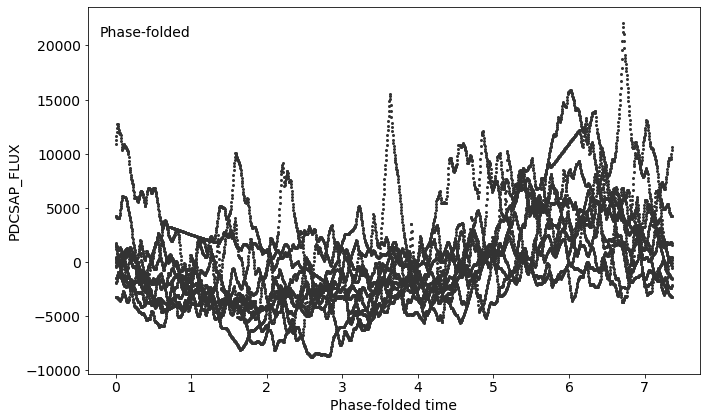

<Figure size 432x288 with 0 Axes>

In [12]:
dmtau.period   = round(np.array(period_list)[index][0], 3)
dmtau.phase_fold(plot_preview=True, previewfig_name=source_name + 'bestphasefold.pdf')

# Comparing Keplerian-K2 data and the VRI monitoring taken in 2019

In [33]:
# time offset of Kepler-K2 data
K2toff = 2454833.0  # days

# read DM Tau data
source_name = 'dmtau_'

# Load data and plot a preview
dmtau = lightcurve(filename = '../DATA/K2/DM-Tau_1.csv',
                      time_col_label='TIME',
                      data_col_label='PDCSAP_FLUX',
                      plot_preview=False,
                      previewfig_name=source_name + 'input.pdf',
                      verbose=True
                     )
dmtau.period = 7.364
# interpolating data on regular time grid (following Cody+14 to use 6 mins grid)
time_grid = np.arange(dmtau.mintime, dmtau.maxtime, 6.0 * (1.0/(24.0*60.0) ))
dmtau.interpolate(time_grid = time_grid,
                     plot_preview=False,
                     previewfig_name=source_name + 'interpolate.pdf'
                    )
dmtau.data_plot = dmtau.data
dmtau.time_plot = dmtau.time
K2_time_min     = np.min(dmtau.time) + K2toff
K2_zerotime_remainder = np.min(dmtau.time) % dmtau.period

# subtracting 10-days smoothed data
smoothed_data = dmtau.boxcar_smooth(boxsize=10.0)
dmtau.data_plot = dmtau.data - smoothed_data

dmtau.phase_fold(plot_preview=False)

# perform boxcar smoothing
dmtau.time = dmtau.time_plot
dmtau.data = dmtau.data_plot
dmtau.data_plot = dmtau.boxcar_smooth(boxsize=0.2)

K2_fold_time = dmtau.time_plot[::200] 
K2_fold_data = dmtau.data_plot[::200]
K2_fold_data[0] = K2_fold_data[1]  # to avoid edge effect

Warning. Time step is not uniform. 

Identified time steps :  {0.020433000000139145, 0.02043199999980061, 0.020432000000255357, 0.02043200000116485, 0.020431999998436368, 0.020431999998891115, 0.020432999998774903, 0.020432999999684398, 0.02043300000104864, 0.020433000001503387, 0.02043099999991682, 0.020430999999462074, 0.020433000000593893, 0.02043100000037157, 0.020431999999345862, 0.020431000001281063, 0.020430999999007327, 0.020428000000265456, 0.02043599999979051, 0.02043099999855258} 



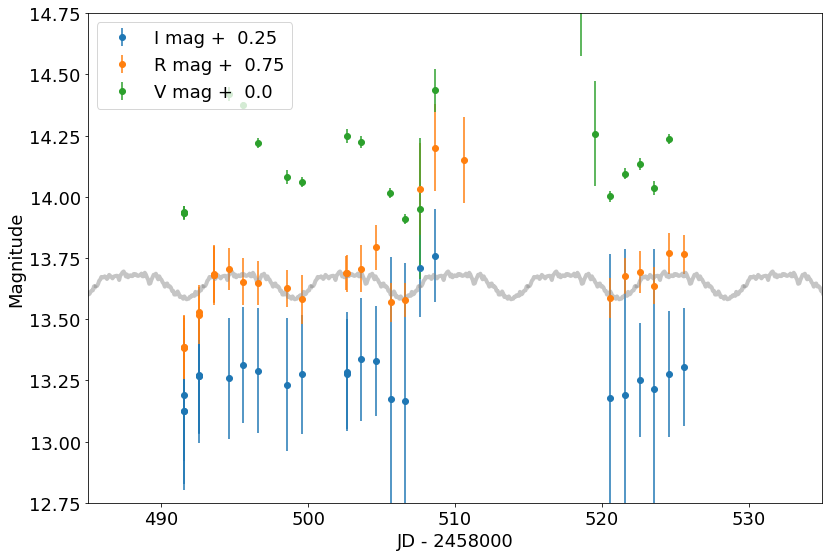

<Figure size 432x288 with 0 Axes>

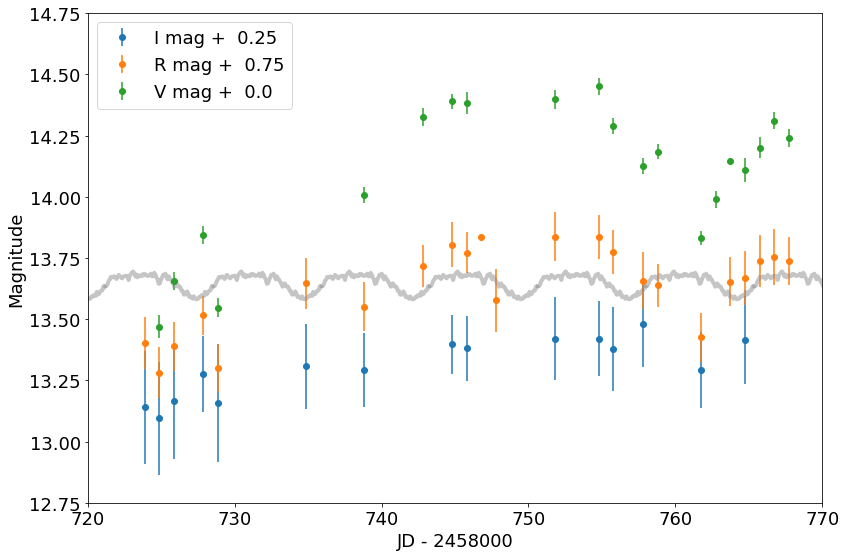

<Figure size 432x288 with 0 Axes>

In [34]:
date_zero = 2458000.0
date_range_dict = {}
date_range_dict['early2019'] = (485, 535)
date_range_dict['late2019']  = (720, 770)


# read the VRI photometric data
# get header
photometry_file = './photometry.txt'
F_photometry = open(photometry_file, 'r')
header_list = F_photometry.readline().split()
F_photometry.close()


for epoch_label in ['early2019','late2019']:
    
    # Initializing figure
    fig = plt.figure(figsize=[12,8])
    ax  = fig.add_axes([0.1,0.1,0.85,0.85])
    
    # obtain the date range for plotting
    JD_col   = header_list.index('JD') - 1
    JD  = np.loadtxt(photometry_file, comments='#', skiprows=0, usecols=JD_col )
    min_JD = np.min(JD)
    max_JD = np.max(JD)    

    mag_bias_dict = {}
    mag_bias_dict['V'] = 0.0
    mag_bias_dict['R'] = 0.75
    mag_bias_dict['I'] = +0.25

    # Overplotting replicated K2 data
    min_rep = round( (min_JD - K2_time_min) / dmtau.period ) - 1
    max_rep = round( (max_JD - K2_time_min) / dmtau.period ) + 1
    for i in range(int(min_rep), int(max_rep), 1):
        K2_plot_time = float(i) * dmtau.period + K2_time_min + K2_fold_time - K2_zerotime_remainder
        ax.plot(K2_plot_time - date_zero, 25.75-2.5*np.log10(K2_fold_data), '-', 
                markersize=1, linewidth=4, color=(0.55, 0.55, 0.55, 0.5))

    # plotting monitoring data
    for band in ['I','R','V']:
        JD_col   = header_list.index('JD') - 1
        mag_col    = header_list.index(band+'_band_magnitudes') - 1
        magerr_col = header_list.index(band+'_band_magnitudes_Error') - 1

        # Read data
        JD  = np.loadtxt(photometry_file, comments='#', skiprows=0, usecols=JD_col )
        mag    = np.loadtxt(photometry_file, comments='#', skiprows=0, usecols=mag_col )
        magerr = np.loadtxt(photometry_file, comments='#', skiprows=0, usecols=magerr_col )

        # clip zeros
        JD  = JD[ mag > 0 ]
        magerr = magerr[mag > 0 ]
        mag = mag[ mag > 0 ]

        mag    = mag + mag_bias_dict[band]

        ax.errorbar(JD-date_zero, mag, yerr=magerr, fmt='o', 
                    label=band+' mag +  '+str(mag_bias_dict[band]) )



    plt.tick_params(labelsize=18)
    plt.xlabel('JD - ' + str(round(date_zero)), fontsize=18)
    plt.ylabel('Magnitude', fontsize=18)
    plt.xlim(date_range_dict[epoch_label])
    plt.ylim(12.75, 14.75)

    plt.legend(loc=2, fontsize=18)

    plt.show()
    plt.savefig('photometry_' + epoch_label + '.pdf')